11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training model with 1 hidden layer(s)...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy: 0.9647
Training model with 10 hidden layer(s)...
Accuracy: 0.9677
Training model with 20 hidden layer(s)...
Accuracy: 0.9589
Training model with 30 hidden layer(s)...
Accuracy: 0.5554
Training model with 50 hidden layer(s)...
Accuracy: 0.1135


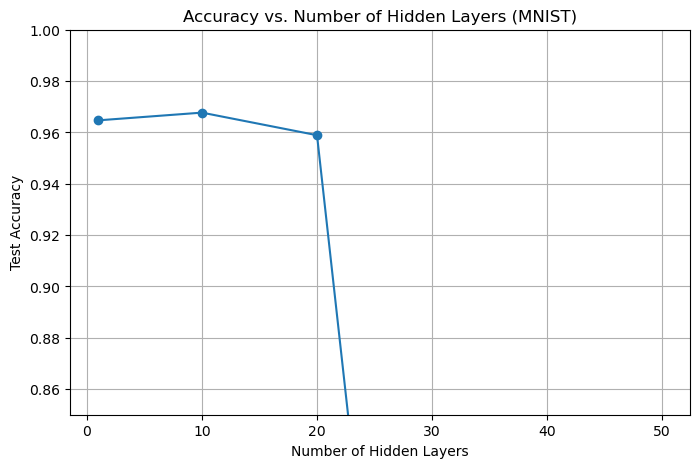

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Function to create a model with a given number of hidden layers
def build_model(num_hidden_layers, hidden_units=64):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_hidden_layers):
        model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Try models with increasing depth
layer_counts = [1, 10, 20, 30, 50]
accuracies = []

for count in layer_counts:
    print(f"Training model with {count} hidden layer(s)...")
    model = build_model(count)
    model.fit(x_train, y_train_cat, epochs=5, batch_size=128, verbose=0)
    _, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    accuracies.append(acc)
    print(f"Accuracy: {acc:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(layer_counts, accuracies, marker='o')
plt.title('Accuracy vs. Number of Hidden Layers (MNIST)')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.ylim(0.85, 1.0)
plt.show()
